# WeatherPy
----

### Analysis
* The largest wind speeds occured deep in the northern hemisphere, which recently passed its winter solstice on 12/21/18.
* City temperatures in the southern hemisphere were significantly more tightly clustered than those in the northern hemisphere.
* Cities in the latitude range of (0, 20) were the least likely to be very cloudy (>80% cloudiness) when compared to all other ranges of the same size.

---


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from datetime import datetime
from api_keys import weather_api_key
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Identify nearest city for each lat, lng combination
cities_df = pd.DataFrame(columns=["City", "Country"])

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        cities_df = cities_df.append({"City": city,"Country": country,}, ignore_index=True)
# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
columns = ["City", "Country","Max Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
clean_cities_df = pd.DataFrame(columns=columns)

base_url = "http://api.openweathermap.org/data/2.5/weather?"
row_count = 1
print("Beginning Data Retrieval")
for index, row in cities_df.iterrows():
    time.sleep(1)
    row_city = row["City"]
    city_url = row_city.replace(" ", "+")
    print("-----------------------")
    query_url = f"{base_url}appid={weather_api_key}&q={city_url}&units=imperial"
    response = requests.get(query_url).json() 
    if response["cod"] == "404":
        print("City not found, skipping...")
    else:
        clean_cities_df.at[index, "City"] = response["name"]
        clean_cities_df.at[index, "Country"] = response["sys"]["country"]
        clean_cities_df.at[index, "Max Temperature (F)"] = response["main"]["temp_max"]
        clean_cities_df.at[index, "Latitude"] = response["coord"]["lat"]
        clean_cities_df.at[index, "Longitude"] = response["coord"]["lon"]
        clean_cities_df.at[index, "Humidity (%)"] = response["main"]["humidity"]
        clean_cities_df.at[index, "Cloudiness (%)"] = response["clouds"]["all"]
        clean_cities_df.at[index, "Wind Speed (mph)"] = response["wind"]["speed"]
        print(f"Now Processing City #{row_count} | {row_city}")
        print(query_url)
        row_count += 1

Beginning Data Retrieval
-----------------------
Now Processing City #1 | bethel
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=bethel&units=imperial
-----------------------
Now Processing City #2 | maloy
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=maloy&units=imperial
-----------------------
Now Processing City #3 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=rikitea&units=imperial
-----------------------
Now Processing City #4 | port hardy
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=port+hardy&units=imperial
-----------------------
Now Processing City #5 | geraldton
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=geraldton&units=imperial
-----------------------
Now Processing City #6 | fortuna
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd7971

-----------------------
Now Processing City #48 | kamena vourla
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=kamena+vourla&units=imperial
-----------------------
Now Processing City #49 | northam
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=northam&units=imperial
-----------------------
City not found, skipping...
-----------------------
Now Processing City #50 | rozivka
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=rozivka&units=imperial
-----------------------
Now Processing City #51 | luderitz
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=luderitz&units=imperial
-----------------------
Now Processing City #52 | georgetown
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=georgetown&units=imperial
-----------------------
Now Processing City #53 | santa cruz del sur
http://api.ope

-----------------------
Now Processing City #93 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=ribeira+grande&units=imperial
-----------------------
Now Processing City #94 | constitucion
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=constitucion&units=imperial
-----------------------
Now Processing City #95 | biak
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=biak&units=imperial
-----------------------
Now Processing City #96 | canon city
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=canon+city&units=imperial
-----------------------
Now Processing City #97 | kahului
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=kahului&units=imperial
-----------------------
Now Processing City #98 | new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058f

-----------------------
Now Processing City #139 | kendari
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=kendari&units=imperial
-----------------------
Now Processing City #140 | savelugu
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=savelugu&units=imperial
-----------------------
Now Processing City #141 | dunedin
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=dunedin&units=imperial
-----------------------
City not found, skipping...
-----------------------
Now Processing City #142 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=longyearbyen&units=imperial
-----------------------
Now Processing City #143 | bireun
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=bireun&units=imperial
-----------------------
Now Processing City #144 | auki
http://api.openweathermap.org/da

-----------------------
Now Processing City #186 | lisala
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=lisala&units=imperial
-----------------------
Now Processing City #187 | port-gentil
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=port-gentil&units=imperial
-----------------------
Now Processing City #188 | oktyabrskiy
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=oktyabrskiy&units=imperial
-----------------------
Now Processing City #189 | zhangjiakou
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=zhangjiakou&units=imperial
-----------------------
Now Processing City #190 | tilichiki
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=tilichiki&units=imperial
-----------------------
Now Processing City #191 | dwarka
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d80

-----------------------
Now Processing City #233 | coihaique
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=coihaique&units=imperial
-----------------------
Now Processing City #234 | alakurtti
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=alakurtti&units=imperial
-----------------------
City not found, skipping...
-----------------------
Now Processing City #235 | tacuati
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=tacuati&units=imperial
-----------------------
Now Processing City #236 | fort nelson
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=fort+nelson&units=imperial
-----------------------
Now Processing City #237 | kieta
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=kieta&units=imperial
-----------------------
Now Processing City #238 | harper
http://api.openweathermap.or

-----------------------
Now Processing City #280 | nouadhibou
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=nouadhibou&units=imperial
-----------------------
City not found, skipping...
-----------------------
Now Processing City #281 | watertown
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=watertown&units=imperial
-----------------------
Now Processing City #282 | ayan
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=ayan&units=imperial
-----------------------
Now Processing City #283 | tambun
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=tambun&units=imperial
-----------------------
Now Processing City #284 | ada
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=ada&units=imperial
-----------------------
Now Processing City #285 | khuzdar
http://api.openweathermap.org/data/2.5/weathe

-----------------------
Now Processing City #325 | mayo
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=mayo&units=imperial
-----------------------
Now Processing City #326 | bom jesus do itabapoana
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=bom+jesus+do+itabapoana&units=imperial
-----------------------
Now Processing City #327 | katsuura
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=katsuura&units=imperial
-----------------------
Now Processing City #328 | rock sound
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=rock+sound&units=imperial
-----------------------
Now Processing City #329 | ca mau
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=ca+mau&units=imperial
-----------------------
Now Processing City #330 | mayor pablo lagerenza
http://api.openweathermap.org/data/2.5/weathe

-----------------------
Now Processing City #372 | alice springs
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=alice+springs&units=imperial
-----------------------
Now Processing City #373 | elbistan
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=elbistan&units=imperial
-----------------------
Now Processing City #374 | turayf
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=turayf&units=imperial
-----------------------
Now Processing City #375 | lorengau
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=lorengau&units=imperial
-----------------------
Now Processing City #376 | kaeo
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=kaeo&units=imperial
-----------------------
Now Processing City #377 | mehamn
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf

-----------------------
Now Processing City #418 | kiruna
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=kiruna&units=imperial
-----------------------
Now Processing City #419 | kachug
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=kachug&units=imperial
-----------------------
Now Processing City #420 | gwanda
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=gwanda&units=imperial
-----------------------
Now Processing City #421 | vihari
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=vihari&units=imperial
-----------------------
Now Processing City #422 | kamaishi
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=kamaishi&units=imperial
-----------------------
City not found, skipping...
-----------------------
Now Processing City #423 | gouvy
http://api.openweathermap.org/data/2.5/weather?

-----------------------
Now Processing City #465 | huarmey
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=huarmey&units=imperial
-----------------------
City not found, skipping...
-----------------------
Now Processing City #466 | saint anthony
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=saint+anthony&units=imperial
-----------------------
Now Processing City #467 | pahrump
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=pahrump&units=imperial
-----------------------
City not found, skipping...
-----------------------
Now Processing City #468 | arlit
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=arlit&units=imperial
-----------------------
Now Processing City #469 | kyzyl-suu
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=kyzyl-suu&units=imperial
-----------------------
City not f

-----------------------
Now Processing City #510 | kununurra
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=kununurra&units=imperial
-----------------------
City not found, skipping...
-----------------------
Now Processing City #511 | salmo
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=salmo&units=imperial
-----------------------
Now Processing City #512 | taylor
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=taylor&units=imperial
-----------------------
Now Processing City #513 | ketchikan
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=ketchikan&units=imperial
-----------------------
City not found, skipping...
-----------------------
Now Processing City #514 | kavaratti
http://api.openweathermap.org/data/2.5/weather?appid=65b7a42912d8058fd797162cd6378cf1&q=kavaratti&units=imperial
-----------------------
Now Processing C

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
clean_cities_df.to_csv("City_Data.csv")
clean_cities_df.reset_index(drop=True, inplace=True)
clean_cities_df.head(20)

,City,Country,Max Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Bethel,US,-16.07,60.79,-161.76,76,1,12.75
1,Maloy,ID,76.09,1,118.1,84,8,2.62
2,Rikitea,PF,79.92,-23.12,-134.97,97,44,15.03
3,Port Hardy,CA,46.4,50.7,-127.42,87,75,3.36
4,Geraldton,CA,-2.21,49.72,-86.95,49,75,2.24
5,Fortuna,ES,51.8,38.18,-1.13,42,0,5.82
6,Dikson,RU,-17.69,73.51,80.55,100,32,7.76
7,Busselton,AU,64.53,-33.64,115.35,100,12,13.02
8,Vaini,IN,61.65,15.34,74.49,72,0,3.29
9,Geilo,NO,27.49,60.53,8.21,79,76,8.1


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

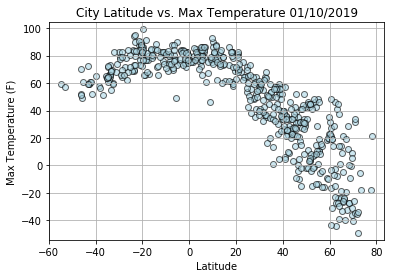

In [6]:
plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Max Temperature (F)"], c= "lightblue",
            edgecolor="black", linewidths=1, marker="o", alpha = 0.6, label = "City")

plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([(clean_cities_df["Latitude"].min()-5),(clean_cities_df["Latitude"].max()+5)])
plt.ylim([(clean_cities_df["Max Temperature (F)"].min()-5),(clean_cities_df["Max Temperature (F)"].max()+5)])

plt.savefig("Latitude_Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

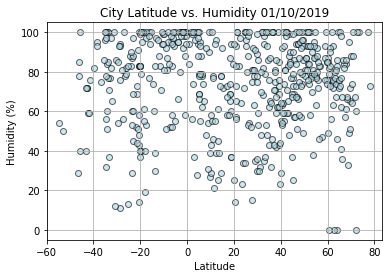

In [7]:
plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Humidity (%)"], c= "lightblue",
            edgecolor="black", linewidths=1, marker="o", alpha = 0.6, label = "City")

plt.title(f"City Latitude vs. Humidity {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([(clean_cities_df["Latitude"].min()-5),(clean_cities_df["Latitude"].max()+5)])
plt.ylim([(clean_cities_df["Humidity (%)"].min()-5),(clean_cities_df["Humidity (%)"].max()+5)])

plt.savefig("Latitude_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

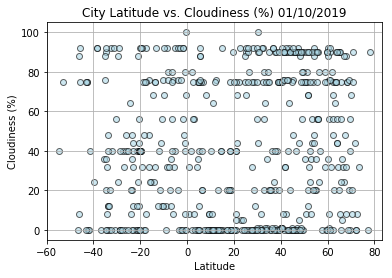

In [8]:
plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Cloudiness (%)"], c= "lightblue",
            edgecolor="black", linewidths=1, marker="o", alpha = 0.6, label = "City")

plt.title(f"City Latitude vs. Cloudiness (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([(clean_cities_df["Latitude"].min()-5),(clean_cities_df["Latitude"].max()+5)])
plt.ylim([(clean_cities_df["Cloudiness (%)"].min()-5),(clean_cities_df["Cloudiness (%)"].max()+5)])

plt.savefig("Latitude_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

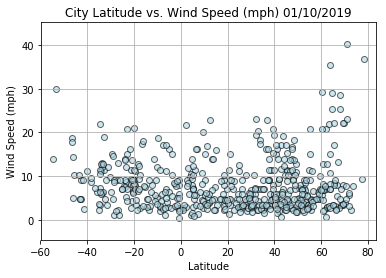

In [9]:
plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Wind Speed (mph)"], c= "lightblue",
            edgecolor="black", linewidths=1, marker="o", alpha = 0.6, label = "City")

plt.title(f"City Latitude vs. Wind Speed (mph) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([(clean_cities_df["Latitude"].min()-5),(clean_cities_df["Latitude"].max()+5)])
plt.ylim([(clean_cities_df["Wind Speed (mph)"].min()-5),(clean_cities_df["Wind Speed (mph)"].max()+5)])

plt.savefig("Latitude_Wind_Speed.png")
plt.show()